# Utilities Consumption Study
# Electricity Notebook
### Sidclay da Silva
### July 2020
---

### Introduction

This notebook is part of a study which includes analysis of self water and electricity consumption, and the relation between consumption and the variation of local temperature and relative humidity.

A separate document will be developed with the complete analysis.

---

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The source for electricity consumption data was the monthly billing, which is based on energy company monthly reading from the electricity meter. Data has been collected and stored in a local file in ```CSV``` format. The file contains the following data;

| |Column| Data type| Description|
|--:|:--|:--|:--|
|1|**period**| ```string``` in format *YYYY-MM*| Year and month of the billing reference|
|2|**previous_check_date**| ```string``` in format *DD/MM/YYYY*| Date of the previous consumption reading|
|3|**current_check_date**| ```string``` in format *DD/MM/YYYY*| Date of the current consumption reading|
|4|**previous_mark**| ```integer```| Electricity meter indicator mark of previous consumption reading|
|5|**current_mark**| ```integer```| Electricity meter indicator mark of current consumption reading|
|6|**consumption_kwh**| ```integer```| Electricity consumption in kilowatt-hour, difference between *current_mark* and *previous_mark*|

Read data from ```CSV``` file

In [2]:
# read CSV file form local folder
df_electr = pd.read_csv('./Data_source/Data_Electricity.csv', sep=';', header=0)
df_electr

,period,previous_check_date,current_check_date,previous_mark,current_mark,consumption_kwh
0,2020-06,27/05/2020,26/06/2020,16.642,17.002,360
1,2020-05,29/04/2020,27/05/2020,16.298,16.642,344
2,2020-04,27/03/2020,29/04/2020,15.996,16.298,302
3,2020-03,27/02/2020,27/03/2020,15.726,15.996,270
4,2020-02,27/01/2020,27/02/2020,15.469,15.726,257
...,...,...,...,...,...,...
64,2015-02,26/01/2015,19/02/2015,601.000,641.000,37
65,2015-01,26/12/2014,26/01/2015,411.000,601.000,193
66,2014-12,26/11/2014,26/12/2014,223.000,411.000,188
67,2014-11,24/10/2014,26/11/2014,73.000,223.000,150


Entries are sorted in chronological descenting order from 2014-10 to 2020-06, the dataframe will be sorted in ascending oder.

The inicial period __2014-10__ will not be considered as the house was unoccupied for almost the whole month.

Columns *previous_check_date* and *current_check_date* will be renamed to be shortened.

In [3]:
# copy dataframe exlcuding last observation
df_electr = df_electr[:-1]

# sort dataframe in chronological ascending order
df_electr = df_electr.sort_values(by='period', ignore_index=True)

# rename columns
df_electr = df_electr.rename(columns={'previous_check_date': 'previous_check',
                                    'current_check_date': 'current_check'})
df_electr

,period,previous_check,current_check,previous_mark,current_mark,consumption_kwh
0,2014-11,24/10/2014,26/11/2014,73.000,223.000,150
1,2014-12,26/11/2014,26/12/2014,223.000,411.000,188
2,2015-01,26/12/2014,26/01/2015,411.000,601.000,193
3,2015-02,26/01/2015,19/02/2015,601.000,641.000,37
4,2015-03,19/02/2015,26/03/2015,641.000,947.000,306
...,...,...,...,...,...,...
63,2020-02,27/01/2020,27/02/2020,15.469,15.726,257
64,2020-03,27/02/2020,27/03/2020,15.726,15.996,270
65,2020-04,27/03/2020,29/04/2020,15.996,16.298,302
66,2020-05,29/04/2020,27/05/2020,16.298,16.642,344


Data in columns *previous_check* and *current_check* are in Brazilian standard format __DD/MM/YYYY__, date information is in ```string``` format and stored as ```object``` data type.

In [4]:
# check dataframe colunms data types
df_electr.dtypes

period              object
previous_check      object
current_check       object
previous_mark      float64
current_mark       float64
consumption_kwh      int64
dtype: object

Convert data in columns *previous_check* and *current_check* to ```datetime``` format.

In [5]:
# convert string date to datetime format
df_electr['previous_check'] = pd.to_datetime(df_electr['previous_check'], format='%d/%m/%Y')
df_electr['current_check'] = pd.to_datetime(df_electr['current_check'], format='%d/%m/%Y')

df_electr

,period,previous_check,current_check,previous_mark,current_mark,consumption_kwh
0,2014-11,2014-10-24,2014-11-26,73.000,223.000,150
1,2014-12,2014-11-26,2014-12-26,223.000,411.000,188
2,2015-01,2014-12-26,2015-01-26,411.000,601.000,193
3,2015-02,2015-01-26,2015-02-19,601.000,641.000,37
4,2015-03,2015-02-19,2015-03-26,641.000,947.000,306
...,...,...,...,...,...,...
63,2020-02,2020-01-27,2020-02-27,15.469,15.726,257
64,2020-03,2020-02-27,2020-03-27,15.726,15.996,270
65,2020-04,2020-03-27,2020-04-29,15.996,16.298,302
66,2020-05,2020-04-29,2020-05-27,16.298,16.642,344


Convert columns data type to ```datetime```.

In [6]:
# convert columns data type to datetime
df_electr = df_electr.astype({'previous_check': 'datetime64',
                            'current_check': 'datetime64'})
df_electr.dtypes

period                     object
previous_check     datetime64[ns]
current_check      datetime64[ns]
previous_mark             float64
current_mark              float64
consumption_kwh             int64
dtype: object

Column *period* contains the year and month information in format __YYYY-MM__. The informtation will be split into new columns *year* and *month*.

In [7]:
# create new columns year and month from column period
df_electr['year'] = df_electr['period'].str.slice(start=0, stop=4)
df_electr['month'] = df_electr['period'].str.slice(start=5, stop=7)

df_electr

,period,previous_check,current_check,previous_mark,current_mark,consumption_kwh,year,month
0,2014-11,2014-10-24,2014-11-26,73.000,223.000,150,2014,11
1,2014-12,2014-11-26,2014-12-26,223.000,411.000,188,2014,12
2,2015-01,2014-12-26,2015-01-26,411.000,601.000,193,2015,01
3,2015-02,2015-01-26,2015-02-19,601.000,641.000,37,2015,02
4,2015-03,2015-02-19,2015-03-26,641.000,947.000,306,2015,03
...,...,...,...,...,...,...,...,...
63,2020-02,2020-01-27,2020-02-27,15.469,15.726,257,2020,02
64,2020-03,2020-02-27,2020-03-27,15.726,15.996,270,2020,03
65,2020-04,2020-03-27,2020-04-29,15.996,16.298,302,2020,04
66,2020-05,2020-04-29,2020-05-27,16.298,16.642,344,2020,05


The checking day varies along the year, and the time in days between the checks is not always the same.

In [8]:
# check differencies in days between checks
(df_electr['current_check'] - df_electr['previous_check']).dt.days.unique()

array([33, 30, 31, 24, 35, 28, 29, 32])

The time difference between checks varies from 24 to 35 days, and it has impact in consumption measure and billing. To have a balanced consumption measure three new columns will be created.

* *consumption_days*: time in days between checks $$\left( {current{\_}check}-{previous{\_}check} \right)$$
* *consumption_day_kwh*: calculated electricity consumption per day $$\left( \frac{consumption{\_}kwh}{consumption{\_}days} \right)$$
* *consumption_30d_kwh*: estimated electricity consumption in 30 days $$\left( {consumption{\_}day{\_}kwh} \times {30} \right)$$

In [9]:
# create new columns
df_electr['consumption_days'] = (df_electr['current_check'] - df_electr['previous_check']).dt.days
df_electr['consumption_day_kwh'] = round(df_electr['consumption_kwh'] / df_electr['consumption_days'], 3)
df_electr['consumption_30d_kwh'] = round(df_electr['consumption_day_kwh'] * 30, 3)

df_electr

,period,previous_check,current_check,previous_mark,current_mark,consumption_kwh,year,month,consumption_days,consumption_day_kwh,consumption_30d_kwh
0,2014-11,2014-10-24,2014-11-26,73.000,223.000,150,2014,11,33,4.545,136.35
1,2014-12,2014-11-26,2014-12-26,223.000,411.000,188,2014,12,30,6.267,188.01
2,2015-01,2014-12-26,2015-01-26,411.000,601.000,193,2015,01,31,6.226,186.78
3,2015-02,2015-01-26,2015-02-19,601.000,641.000,37,2015,02,24,1.542,46.26
4,2015-03,2015-02-19,2015-03-26,641.000,947.000,306,2015,03,35,8.743,262.29
...,...,...,...,...,...,...,...,...,...,...,...
63,2020-02,2020-01-27,2020-02-27,15.469,15.726,257,2020,02,31,8.290,248.70
64,2020-03,2020-02-27,2020-03-27,15.726,15.996,270,2020,03,29,9.310,279.30
65,2020-04,2020-03-27,2020-04-29,15.996,16.298,302,2020,04,33,9.152,274.56
66,2020-05,2020-04-29,2020-05-27,16.298,16.642,344,2020,05,28,12.286,368.58


Keep only relevant columns and reorder dataframe columns.

In [10]:
# define relevant and columns order
columns = ['period','year','month','consumption_kwh','consumption_days','consumption_day_kwh','consumption_30d_kwh']

# overwrite dataframe only with relevant columns
df_electr = df_electr[columns]

df_electr

,period,year,month,consumption_kwh,consumption_days,consumption_day_kwh,consumption_30d_kwh
0,2014-11,2014,11,150,33,4.545,136.35
1,2014-12,2014,12,188,30,6.267,188.01
2,2015-01,2015,01,193,31,6.226,186.78
3,2015-02,2015,02,37,24,1.542,46.26
4,2015-03,2015,03,306,35,8.743,262.29
...,...,...,...,...,...,...,...
63,2020-02,2020,02,257,31,8.290,248.70
64,2020-03,2020,03,270,29,9.310,279.30
65,2020-04,2020,04,302,33,9.152,274.56
66,2020-05,2020,05,344,28,12.286,368.58


Check daframe statistics.

In [11]:
# check dataframe statistics
df_electr.describe()

,consumption_kwh,consumption_days,consumption_day_kwh,consumption_30d_kwh
count,68.000000,68.000000,68.000000,68.000000
mean,248.955882,30.470588,8.149162,244.474853
std,57.058868,1.888461,1.802550,54.076489
min,37.000000,24.000000,1.542000,46.260000
25%,217.000000,29.000000,7.245750,217.372500
50%,247.500000,30.000000,8.233000,246.990000
75%,285.500000,32.000000,9.155750,274.672500
max,360.000000,35.000000,12.286000,368.580000


There is a large range between minimum and maximum, interquartile range is also large and standard deviation is quite high, it is a larger number than minimum. It seems that electricity consumption is very irregular, the calculated consumption per day shows the same behaviour. The estimated *consumption_30d_kwh_* is slighly below the *consumption_kwh*, but its minimum is higher.

Compare the consumption frequencies using histograms, one for column *consumption_kwh* and another for column *consumption_30d_kwh*. For better comparison, histograms should have the same x-ticks (bins) and y-ticks (frequencies).

Define bins for histograms.

In [12]:
# define bins edges (x-ticks)
cnt, bins = np.histogram(df_electr['consumption_kwh'])

Create the histograms.

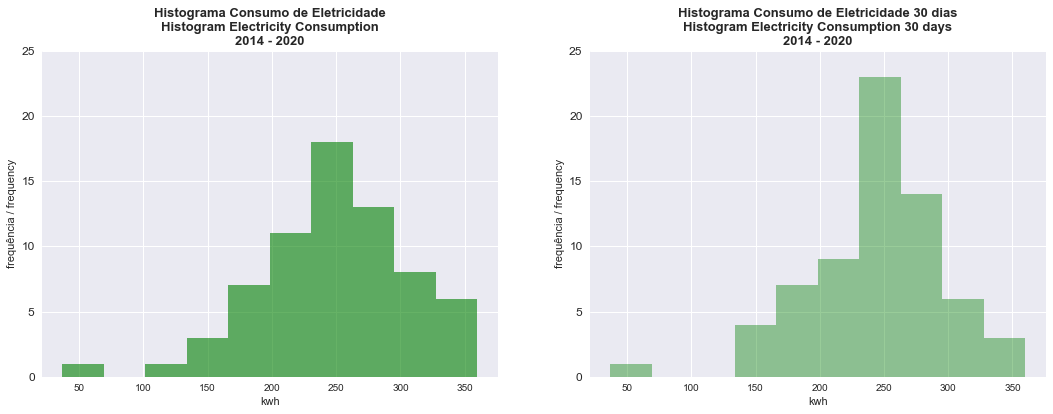

In [13]:
# define plot style
plt.style.use('seaborn')

# define axis label size
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=12)

# create the plot figure
fig = plt.figure(figsize=(18,6))

# create consumption histogram (left)
ax = fig.add_subplot(1,2,1)
ax.hist(df_electr['consumption_kwh'], bins=bins, color='g', alpha=0.6)
ax.set_title('Histograma Consumo de Eletricidade\nHistogram Electricity Consumption\n' + \
             min(df_electr['year']) + ' - ' + max(df_electr['year']), {'fontsize':13}, fontweight=900)

# get y-ticks from histogram
h1_locs, h1_labels = plt.yticks()

# create 30 days consumption histogram (right)
ax = fig.add_subplot(1,2,2)
ax.hist(df_electr['consumption_30d_kwh'], bins=bins, color='g', alpha=0.4)
ax.set_title('Histograma Consumo de Eletricidade 30 dias\nHistogram Electricity Consumption 30 days\n' + \
             min(df_electr['year']) + ' - ' + max(df_electr['year']), {'fontsize':13}, fontweight=900)

# get y-ticks from histogram
h2_locs, h2_labels = plt.yticks()

# take y-ticks with highest frequency
if max(h1_locs) > max(h2_locs):
    yticks_ = h1_locs
else:
    yticks_ = h2_locs

# loop to define similar settings for plots
for a in fig.axes:
    # set y-ticks and labels
    a.set_yticks(yticks_)
    a.set_ylabel('frequência / frequency')
    a.set_xlabel('kwh')
    
# show plot
plt.show()

Check the consumption dynamics along the period with line plots.

Calculated the 12 months mean to be ploted.

In [14]:
# create empty list
mean12m = []

# calculate mean for last 12 observations of consumption_kwh
for i in range(0, df_electr.shape[0]):
    if i < 11:
        mean12m.append(round(np.mean(df_electr.loc[:i,'consumption_kwh']),3))
    else:
        mean12m.append(round(np.mean(df_electr.loc[i-11:i,'consumption_kwh']),3))

Define customized x-labels.

In [15]:
# define a variable to check for the first observation
i = True

# define an empty list
xlabels_ = []

# customize labels having the year only for the first onbservation and for each january
for y, m in zip(df_electr['year'], df_electr['month']):
    if i == True or m == '01':
        xlabels_.append(y+'-'+m)
        i = False
    else:
        xlabels_.append(m)

Create the plot.

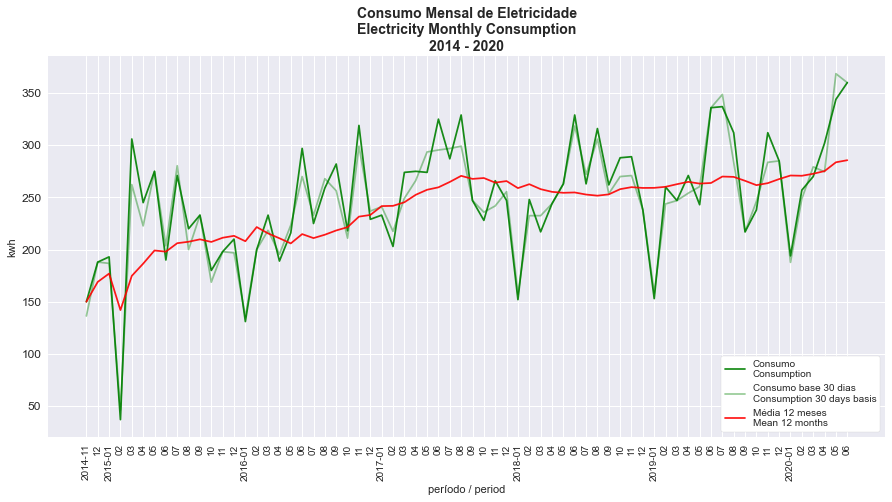

In [16]:
# create the plot figure
fig, ax = plt.subplots(figsize=(15,7))

# plot consumption_kwh, consumption_30d_kwh and mean12m
ax.plot(df_electr['period'], df_electr['consumption_kwh'], color='g', alpha=0.9,
        label='Consumo\nConsumption')
ax.plot(df_electr['period'], df_electr['consumption_30d_kwh'], color='g', alpha=0.4, 
        label='Consumo base 30 dias\nConsumption 30 days basis')
ax.plot(df_electr['period'], mean12m, color='r', alpha=0.9, 
        label='Média 12 meses\nMean 12 months')

# define plot title and axis labels
ax.set_title('Consumo Mensal de Eletricidade\nElectricity Monthly Consumption\n' \
             + min(df_electr['year']) + ' - ' + max(df_electr['year']), {'fontsize':14}, fontweight=900)
ax.set_ylabel('kwh')
ax.set_xlabel('período / period')

# define legend
ax.legend(loc=4, frameon=True, facecolor='white', framealpha=1)

# define x-ticks
plt.xticks(np.arange(0, len(xlabels_), 1), xlabels_, rotation=90)

# show plot
plt.show()

Electricty consumption has increased from 2014 until middle of 2017, and after a stable period it is in icreasing curve in 2020. Analyse the consumption mean per month with bar plot, comparing *consumption_kwh* and *consumption_30d_kwh*.

Create a dataframe grouped by month calculating the mean for required columns, and calculate the overall mean and standard deviation only for the *consumption_khw*.

In [17]:
# create a dataframe with mean per month
df_mean = df_electr[['month','consumption_kwh','consumption_30d_kwh']].groupby('month').mean().reset_index()

# round values to 3 decimal positions
df_mean['consumption_kwh'] = df_mean['consumption_kwh'].apply(lambda v: round(v,3))
df_mean['consumption_30d_kwh'] = df_mean['consumption_30d_kwh'].apply(lambda v: round(v,3))

# calculate overall mean and std for consumption_kwh
meanconsum = round(np.mean(df_mean['consumption_kwh']),3)
stdconsum = round(np.std(df_mean['consumption_kwh']),3)

# show results
print('Overall mean for column consumption_kwh: {:.3f}\nOverall std for column consumption_kwh: {:.3f}\n'.
      format(meanconsum, stdconsum))

df_mean

Overall mean for column consumption_kwh: 249.603
Overall std for column consumption_kwh: 34.520



,month,consumption_kwh,consumption_30d_kwh
0,01,176.000,177.760
1,02,200.833,198.120
2,03,257.833,248.100
3,04,254.333,242.830
4,05,269.167,280.665
5,06,306.167,297.235
6,07,276.600,286.146
7,08,287.200,271.302
8,09,248.200,241.380
9,10,230.400,226.356


Create the plot.

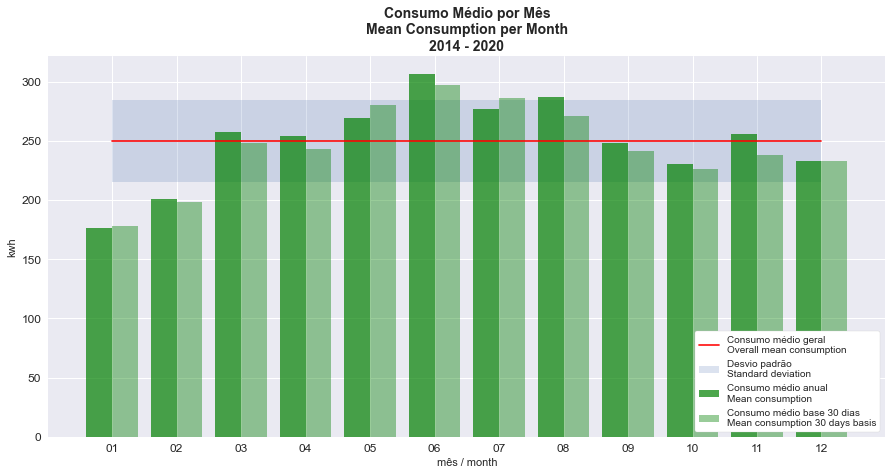

In [18]:
# redefine axis label size
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# create the plot figure
fig, ax = plt.subplots(figsize=(15,7))

# define x-labels locations and bars width
x = np.arange(df_mean.shape[0])
width = 0.4

# plot mean consumption_kwh, mean consumption_30d_kwh, overall mean and std
ax.bar(x - width/2, df_mean['consumption_kwh'], width, color='g', alpha=0.7, 
       label='Consumo médio anual\nMean consumption')
ax.bar(x + width/2, df_mean['consumption_30d_kwh'], width, color='g', alpha=0.4, 
       label='Consumo médio base 30 dias\nMean consumption 30 days basis')
ax.plot(df_mean['month'], np.repeat(meanconsum, df_mean.shape[0]), color='r', alpha=0.9, 
        label='Consumo médio geral\nOverall mean consumption')
ax.fill_between(df_mean['month'], meanconsum-stdconsum, meanconsum+stdconsum, alpha=0.2, 
                label='Desvio padrão\nStandard deviation')

# define legend
ax.legend(loc=4, frameon=True, facecolor='white', framealpha=1)

# define plot title and axis labels
plt.title('Consumo Médio por Mês\nMean Consumption per Month\n' + 
          min(df_electr['year']) + ' - ' + max(df_electr['year']), {'fontsize':14}, fontweight=900)
plt.ylabel('kwh')
plt.xlabel('mês / month')

# show plot
plt.show()

For further analysis only columns *period*, converted to ```datetime``` format, and *consumption_day_kwh* are required. A new dataframe will be created having only required columns. 

In [19]:
# create a new dataframe
features_electricity = df_electr[['period','consumption_day_kwh']]

# convert period to datetime format
features_electricity['period'] = pd.to_datetime(features_electricity['period'], format='%Y-%m')

# rename column consumption_day_kwh
features_electricity = features_electricity.rename(columns={'consumption_day_kwh': 'electr_day_kwh'})

features_electricity

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,period,electr_day_kwh
0,2014-11-01,4.545
1,2014-12-01,6.267
2,2015-01-01,6.226
3,2015-02-01,1.542
4,2015-03-01,8.743
...,...,...
63,2020-02-01,8.290
64,2020-03-01,9.310
65,2020-04-01,9.152
66,2020-05-01,12.286


Export dataframe to local file in ```feather``` format to be retrieved later on.

In [20]:
# export to feather file format
features_electricity.to_feather('./Data_source/Features_Electricity.feather')